## Observations and Insights 

In [ ]:
###Lalith made changes to this file in the branch

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata,study_results, how = "left", on="Mouse ID")

In [12]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [13]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Checking the number of mice in the DataFrame.
len(mouse_study["Mouse ID"].unique())

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study['Mouse ID'] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.loc[mouse_study['Mouse ID'] != "g989"]
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = clean_mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary = pd.DataFrame({"Mean Tumor Volume":mean,
                        "Median Tumor Volume":median,
                        "Tumor Volume Variance":var,
                        " Tumor Volume Standard Deviaton":stdev,
                        " Tumor Volume standard errors":sem
                        })
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviaton,Tumor Volume standard errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
clean_mouse_study.groupby('Drug Regimen').agg({"mean","median","var","std","sem"})['Tumor Volume (mm3)']

,sem,mean,std,median,var
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,4.994774,41.557809,24.947764
Ceftamin,0.469821,52.591172,6.268188,51.776157,39.290177
Infubinol,0.492236,52.884795,6.567243,51.820584,43.128684
Ketapril,0.603860,55.235638,8.279709,53.698743,68.553577
Naftisol,0.596466,54.331565,8.134708,52.509285,66.173479
Placebo,0.581331,54.033581,7.821003,52.288934,61.168083
Propriva,0.544332,52.320930,6.622085,50.446266,43.852013
Ramicane,0.320955,40.216745,4.846308,40.673236,23.486704
Stelasyn,0.573111,54.233149,7.710419,52.431737,59.450562


## Bar Plots

Text(0, 0.5, 'Number of Data points')

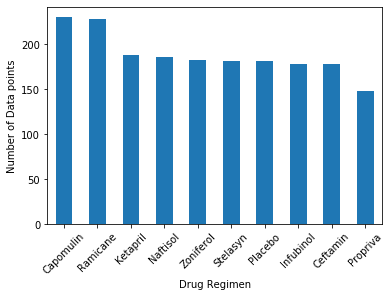

In [49]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of 
# the study using pandas.
counts = clean_mouse_study['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Number of Data points")

Text(0, 0.5, 'Number of Data points')

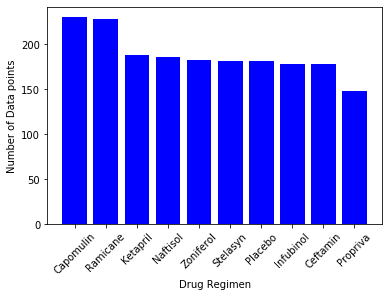

In [50]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the 
#study using pyplot.
counts = clean_mouse_study['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values,color="b", align="center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Number of Data points")

## Pie Plots

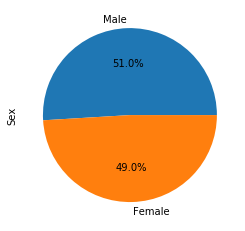

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_mouse_study['Sex'].value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

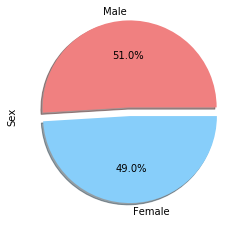

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
counts = clean_mouse_study.Sex.value_counts()

plt.pie(counts.values, labels=counts.index.values,colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [143]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [192]:
# Start by getting the last (greatest) timepoint for each mouse
c = clean_mouse_study.groupby(["Mouse ID"]).max()
c=c.reset_index()
merged_data = c[["Mouse ID","Timepoint"]].merge(clean_mouse_study, on=["Mouse ID","Timepoint"],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [197]:
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
capomulin

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [193]:
merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [175]:
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = upperq-lowerq
print(f"The lower quartile of capomulin is: {cap_lowerq}")
print(f"The upper quartile of capomulin is: {cap_upperq}")
print(f"The interquartile range of capomulin is: {cap_iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")
lower_bound = cap_lowerq - (1.5*cap_iqr)
upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [181]:
ram_quartiles = ramicane.quantile([.25,.5,.75])

ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = upperq-lowerq
print(f"The lower quartile of ramicane is: {ram_lowerq}")
print(f"The upper quartile of ramicane is: {ram_upperq}")
print(f"The interquartile range of ramicane is: {ram_iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 7.781863460000004
The the median of ramicane is: 38.125164399999996 
Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.


31.56046955

In [178]:
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = upperq-lowerq
print(f"The lower quartile of infubinol is: {inf_lowerq}")
print(f"The upper quartile of infubinol is: {inf_upperq}")
print(f"The interquartile range of infubinol is: {inf_iqr}")
print(f"The the median of infubinol is: {quartiles[0.5]} ")
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 7.781863460000004
The the median of infubinol is: 38.125164399999996 
Values below 42.375812499999995 could be outliers.
Values above 77.19853804 could be outliers.


In [179]:
chef_quartiles = ceftamin.quantile([.25,.5,.75])
chef_lowerq = chef_quartiles[0.25]
chef_upperq = chef_quartiles[0.75]
chef_iqr = upperq-lowerq
print(f"The lower quartile of chefomulin is: {chef_lowerq}")
print(f"The upper quartile of chefomulin is: {chef_upperq}")
print(f"The interquartile range of chefomulin is: {chef_iqr}")
print(f"The the median of chefomulin is: {quartiles[0.5]} ")
cheflower_bound = chef_lowerq - (1.5*chef_iqr)
chefupper_bound = chef_upperq + (1.5*chef_iqr)
print(f"Values below {cheflower_bound} could be outliers.")
print(f"Values above {chefupper_bound} could be outliers.")

The lower quartile of chefomulin is: 48.72207785
The upper quartile of chefomulin is: 64.29983003
The interquartile range of chefomulin is: 7.781863460000004
The the median of chefomulin is: 38.125164399999996 
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.


In [196]:
capomulin = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
capomulin

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

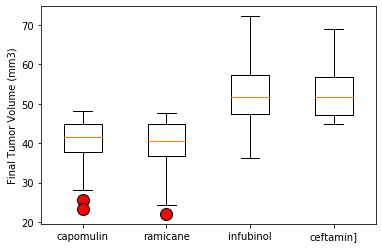

In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin]"],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

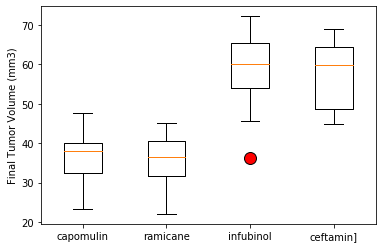

In [188]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin]"],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_mouse_study.columns
capomulin_table = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Capomulin"]
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"] == "l509"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

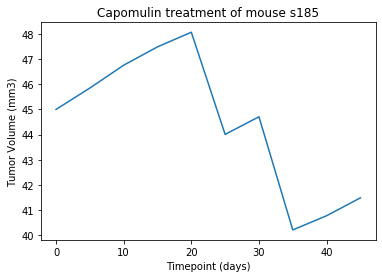

In [117]:
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')

In [96]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_capomulin = capomulin_table.groupby(["Mouse ID"]).mean()
average_capomulin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


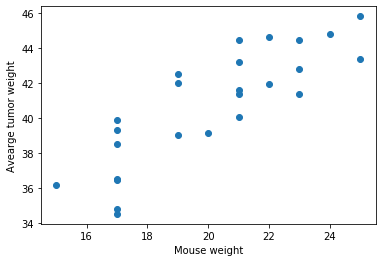

In [98]:
plt.scatter(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
plt.xlabel('Mouse weight')
plt.ylabel('Avearge tumor weight')
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [102]:
corr = round(st.pearsonr(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])[0],2)
print(f"Correlation coefficient between Mouse weight and average tumor volume is {corr}")

Correlation coefficient between Mouse weight and average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

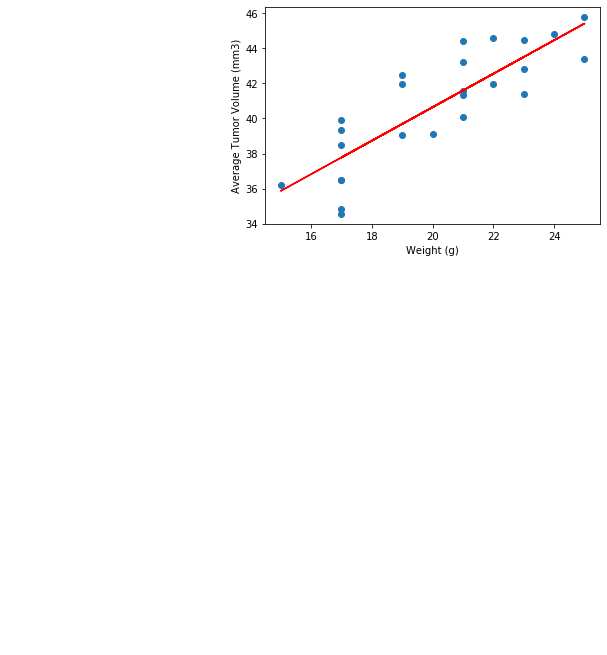

In [115]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
y_values = average_capomulin["Tumor Volume (mm3)"]
plt.scatter(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')